In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

In [2]:
# Read the dataset 
df=pd.read_excel(r"C:\Users\PJugantM\OneDrive - Capgemini\Documents\Height_weight.xlsx")

In [3]:
df.head()

,Weight,Height
0,77,165
1,80,166
2,90,178
3,95,179
4,78,166


Text(0, 0.5, 'Height')

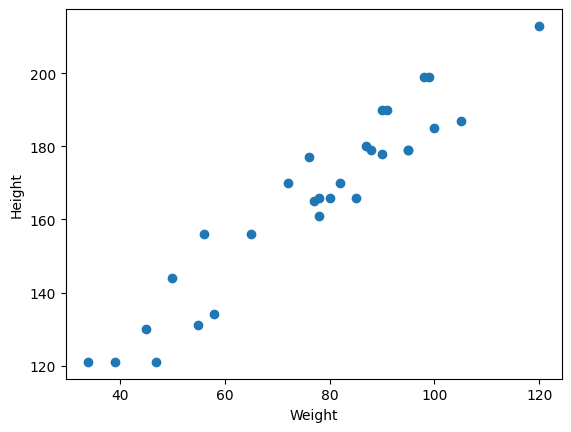

In [4]:
plt.scatter(df['Weight'] ,df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
            

In [5]:
#steps to create the machinelearning model
# 1) Divide the features based on independent and dependent features .
# 2) Train test split of the dataset .
# 3) Standardise the data 
# 4) Train the model using Linear regression 

In [6]:
# Divide our dataset into independent and dependent features
X=df[['Weight']] #indepedent
y=df['Height'] #dependent


In [7]:
X

,Weight
0,77
1,80
2,90
3,95
4,78
5,82
6,95
7,105
8,100
9,85


In [8]:
y

0     165
1     166
2     178
3     179
4     166
5     170
6     179
7     187
8     185
9     166
10    161
11    144
12    156
13    177
14    180
15    130
16    156
17    170
18    190
19    121
20    199
21    199
22    213
23    131
24    134
25    179
26    121
27    121
28    190
Name: Height, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [11]:
X.shape

(29, 1)

In [12]:
X_train.shape ,X_test.shape

((23, 1), (6, 1))

In [13]:
y_train.shape,y_test.shape

((23,), (6,))

In [14]:
# stadardise the dataset Train independent data 
from sklearn.preprocessing import StandardScaler 

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

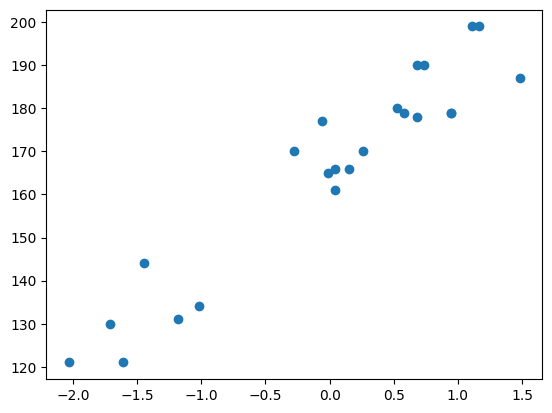

In [17]:
plt.scatter(X_train,y_train)
plt.show

In [18]:
# lets train the model(simple linear regression )
from sklearn.linear_model import LinearRegression


In [19]:
regressor = LinearRegression() 

In [20]:
regressor.fit(X_train,y_train) 

LinearRegression()

In [21]:
print("The slope or coefficient of weight is " ,regressor.coef_ )
print("Intercept : ",regressor.intercept_)

The slope or coefficient of weight is  [22.52226381]
Intercept :  165.91304347826087


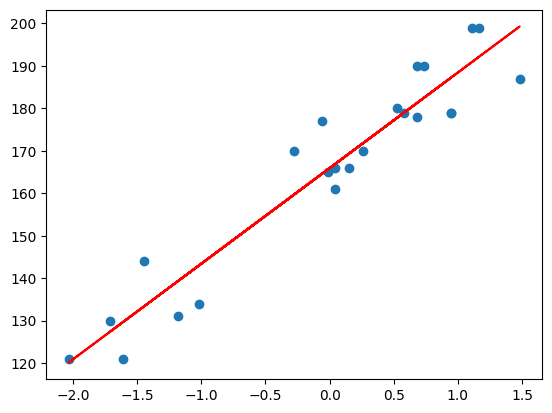

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r') 

##### Prediction of train data 
###### 1.predicted height output = intercept + coef_(Weights)
###### 2.y_pred_train = 165.91 + 22.52(X_train)

##### prediction of test data 
###### 1.predicted height output = intercept + coef_(Weights)
###### 2.y_pred_test = 165.91 + 22.52(X_test) 

In [23]:
y_pred_test = regressor.predict(X_test) 

In [24]:
y_pred_test ,y_test

(array([114.14700084, 140.52526627, 151.31637486, 217.26203845,
        193.28179714, 175.29661616]),
 27    121
 16    156
 12    156
 22    213
 8     185
 9     166
 Name: Height, dtype: int64)

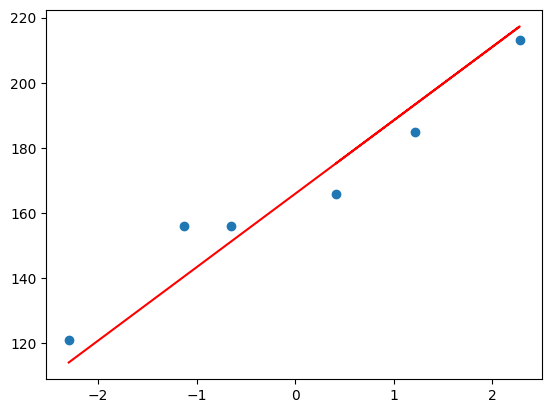

In [25]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r') 

In [26]:
# performance metrics
# MSE 
# MAE
# RMSE
#Rsquare and Adjusted Rsquare 


In [ ]:
# R SQUARE 
# FORMULA 
# R^2 = 1-SSR/SST
# R^2 = coefficient of determination SSR = sum of squares of residuals SST= total sum of squares 

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [28]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test) 
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse) 

80.2579222799955
8.141968297509083
8.958678601222141


In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

In [31]:
score

0.8995694948701785

In [32]:
# Adjusted R square 
# Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
# where R2=The R2 of the model 
# n = The number of observations 
# k = The number of predictor variables 

In [33]:
# display adjusted R-Squared 
1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1) 

0.874461868587723

In [34]:
# the R square value will always be greated than Adjusted Rsquare


In [36]:
# new data point weight is 80 
scaled_weight = scaler.transform([[80]]) 
scaled_weight

C:\Users\PJugantM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.15045168]])

In [38]:
scaled_weight[0] 

array([0.15045168])

In [40]:
print("The height prediction for weight 80kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80kg is : [169.30155584]


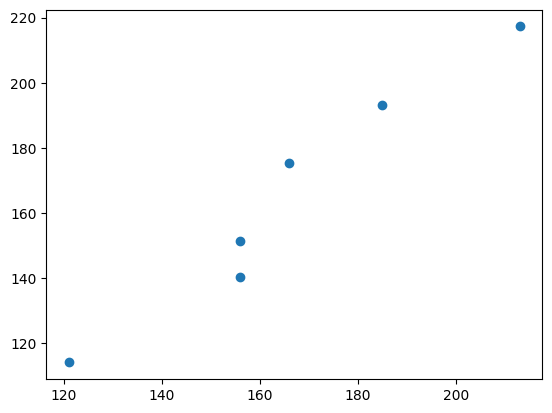

In [41]:
# Assumption 
# Plot a scatter plot for the prediction 

plt.scatter(y_test,y_pred_test)

In [42]:
# residuals 
residuals = y_test-y_pred_test 
residuals

27     6.852999
16    15.474734
12     4.683625
22    -4.262038
8     -8.281797
9     -9.296616
Name: Height, dtype: float64

C:\Users\PJugantM\AppData\Local\Temp\ipykernel_31856\3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

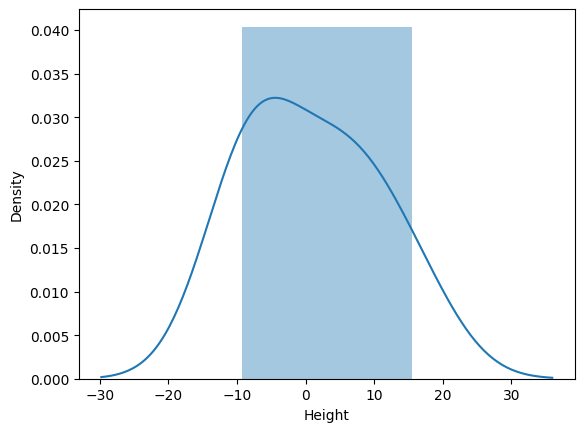

In [43]:
import seaborn as sns
sns.distplot(residuals,kde=True)

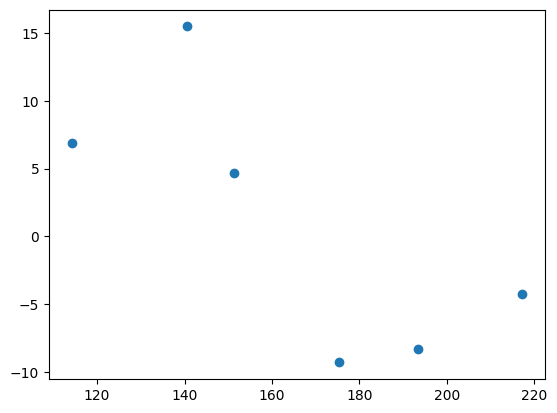

In [44]:
plt.scatter(y_pred_test,residuals) 